#### Imports

In [1]:
import pandas as pd
import numpy as np
import os

from sklearn.metrics import adjusted_rand_score


# Load and analyze data

In [2]:
df_meta_data = pd.read_csv('01_simulated_data/metadata.csv', sep=",")
print(f'size df: {len(df_meta_data)}')
print(f'keys:{df_meta_data.keys()}')
print(f'Nr different files: {df_meta_data["sample_id"].unique().size}')
print(f'Different codintions: {df_meta_data["subclass"].unique()}')
print(f'Different labs: {df_meta_data["class"].unique()}')

# rename columns sample_id to file, subclass to condition and class to lab
df_meta_data = df_meta_data.rename(columns={"sample_id": "file", "subclass": "condition", "class": "lab"})
print(f'keys:{df_meta_data.keys()}')

df_meta_data.head()

df = pd.read_csv('01_simulated_data/simulated_data.csv', sep=",", index_col=0)
######### NEW ##############
# To be sure that order is the same:
df = df.loc[:, df_meta_data['file']]
############################
print(f'data shape: {df.shape}')


size df: 2000
keys:Index(['sample_id', 'class', 'batch', 'subclass', 'covariate'], dtype='object')
Nr different files: 2000
Different codintions: ['Class1_sub3' 'Class1_sub2' 'Class2_sub4' 'Class1_sub1' 'Class3_sub5'
 'Class3_sub6']
Different labs: ['Class1' 'Class2' 'Class3']
keys:Index(['file', 'lab', 'batch', 'condition', 'covariate'], dtype='object')
data shape: (7000, 2000)


## DF analysis

In [3]:
df.head(10)

,sample_1,sample_10,sample_100,sample_1000,sample_1001,sample_1002,sample_1003,sample_1004,sample_1005,sample_1006,...,sample_990,sample_991,sample_992,sample_993,sample_994,sample_995,sample_996,sample_997,sample_998,sample_999
protein_4869,1.770438,4.006577,0.096694,0.998044,0.678895,0.871249,0.129620,0.818378,0.080054,0.344635,...,0.342251,0.196340,0.789647,-0.075246,0.755734,1.234852,0.731493,0.761033,0.857231,1.205146
protein_4049,-2.968686,-1.297817,-0.414848,-0.905751,-0.321175,0.874556,0.445278,-0.937941,-0.167178,0.050588,...,-0.716553,-0.341267,0.432521,-0.191903,-0.408217,-0.601678,0.203350,0.568236,0.414843,0.177003
protein_2305,1.825619,-0.150447,3.407854,1.258774,0.007271,0.644541,1.141358,1.235281,0.919800,0.415377,...,1.648950,-0.561235,1.507159,0.621005,1.239747,0.862549,0.852034,0.974995,1.125463,0.453502
protein_5017,0.207046,-0.638745,-0.730201,1.321746,0.799909,1.238906,0.977332,1.047599,1.371152,2.709256,...,2.695522,1.815009,2.873648,2.392724,2.690379,0.786639,1.929564,1.227116,0.383016,2.548326
protein_1892,-2.920897,-2.679833,-2.602177,-1.043155,-0.070839,-1.089473,0.262765,0.206365,0.010938,-0.562320,...,-0.269050,-0.876122,-0.110169,0.167044,-0.246492,0.479209,0.143358,-0.743548,-0.501896,-0.124311
protein_3980,0.684916,1.980462,1.371931,0.529043,-1.172393,-1.034795,-1.995008,-0.022067,-0.958480,1.411186,...,-0.644732,0.174810,0.356704,1.110528,-1.317028,-0.668616,-1.399240,-1.558680,-0.855270,0.128571
protein_6960,5.080073,5.672850,4.596228,1.637924,1.762980,1.779740,0.689031,1.484499,1.729709,1.856950,...,2.141175,1.408968,1.766121,2.407502,0.679592,1.140323,1.688771,1.768504,2.247584,2.104434
protein_1761,-0.205974,4.798521,3.758859,-0.536848,2.352585,-1.098099,0.438834,-0.095592,1.392399,2.549555,...,1.762577,-0.039534,1.346664,1.954570,0.411191,1.838214,1.135741,1.556576,-0.007639,0.965938
protein_6409,2.717926,-0.400044,2.635785,-1.516412,-0.837240,-0.664822,1.784582,-0.292898,-1.975843,-2.171317,...,-0.690750,-2.271663,-0.318572,0.249431,-0.562198,-0.075176,-0.874791,-1.698413,-0.468137,0.068369
protein_2426,-1.455779,0.155940,-0.573728,0.668457,0.376966,0.180833,0.710104,-0.388938,-0.790022,2.197785,...,1.252445,0.423756,-0.516825,1.446791,-0.475409,0.076819,0.388007,1.321000,0.135098,-0.174653


In [4]:
df_meta_data.groupby(['condition','lab']).count()

,,file,batch,covariate
condition,lab,,,
Class1_sub1,Class1,240,240,71
Class1_sub2,Class1,200,200,59
Class1_sub3,Class1,360,360,99
Class2_sub4,Class2,600,600,197
Class3_sub5,Class3,180,180,52
Class3_sub6,Class3,420,420,122


In [5]:
print(f'Count null im df: {df[df==0].sum().sum()}')
print(f'Count 0 im df: {df[df==0].sum().sum()}')
print(f'Max value im df: {df.max().max()}')
print(f'Min value im df: {df.min().min()}')
print(f'Mean value im df: {df.mean().mean()}')
print(f'Median value im df: {df.median().median()}')
print(f'Standard deviation value im df: {df.std().std()}')


Count null im df: 0.0
Count 0 im df: 0.0
Max value im df: 9.918986805394244
Min value im df: -8.712488541685438
Mean value im df: 0.003039430175915606
Median value im df: -0.009803593021158151
Standard deviation value im df: 0.02786724691486352


In [6]:
df.describe().mean(axis=1)

count    7000.000000
mean        0.003039
std         1.410852
min        -5.922246
25%        -0.896767
50%        -0.009825
75%         0.879860
max         6.571655
dtype: float64

#### Protein (row) analysis

In [7]:
max_indices = []
min_indices = []
for column in df.keys():
  max_indices.append(df[column].argmax())
  min_indices.append(df[column].argmin())

max_indices = np.array(max_indices)
min_indices = np.array(min_indices)
max_indices = np.unique(max_indices)
min_indices = np.unique(min_indices)
print(f'Nr of unique max indices: {max_indices.size}')
print(f'Nr of unique min indices: {min_indices.size}')

min_max_rows = np.append(max_indices, min_indices)
# get names of the rows based on the indices
min_max_rows = df.index[min_max_rows]
np.unique(min_max_rows).size
print(f'Nr of unique min/max indices: {np.unique(min_max_rows).size}')
min_max_rows

Nr of unique max indices: 250
Nr of unique min indices: 321
Nr of unique min/max indices: 570


Index(['protein_1761', 'protein_3166', 'protein_3936', 'protein_6288',
       'protein_3549', 'protein_4354', 'protein_2106', 'protein_2092',
       'protein_193', 'protein_4594',
       ...
       'protein_3029', 'protein_559', 'protein_3358', 'protein_3077',
       'protein_125', 'protein_4713', 'protein_1541', 'protein_4553',
       'protein_5883', 'protein_5421'],
      dtype='object', length=571)

In [8]:
highest_var_rows = df.std(axis=1).sort_values()[-100:].index.values

In [9]:
interesting_rows = np.append(highest_var_rows, min_max_rows)
print("Total nr. of rows with high variance / min & max values:")
print(np.unique(np.append(highest_var_rows, min_max_rows)).size)

Total nr. of rows with high variance / min & max values:
609


#### Sample (column) analysis

In [10]:
topx = 5
print(f'Highest summed samples (top {topx}):\n{df.sum().sort_values()[-topx:]}')
print(f'Lowest summed samples (top {topx}):\n{df.sum().sort_values()[:topx]}')
print(f'Highest variance in sample (top {topx}):\n{df.std().sort_values()[-topx:]}')
print(f'Lowest vairance in samples (top {topx}):\n{df.std().sort_values()[:topx]}')


Highest summed samples (top 5):
sample_681    326.063024
sample_254    346.309566
sample_176    356.510832
sample_531    361.803721
sample_490    387.255577
dtype: float64
Lowest summed samples (top 5):
sample_1719   -390.074633
sample_1699   -365.881593
sample_1677   -321.338673
sample_1423   -314.720842
sample_1866   -314.406829
dtype: float64
Highest variance in sample (top 5):
sample_229    1.498175
sample_737    1.498615
sample_476    1.500662
sample_728    1.508053
sample_713    1.508319
dtype: float64
Lowest vairance in samples (top 5):
sample_1451    1.355675
sample_1996    1.358728
sample_1794    1.360096
sample_1668    1.362484
sample_1786    1.363256
dtype: float64


In [11]:
# !pip install torch torchvision torchmetrics
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from torch import nn
from sklearn.cluster import KMeans

In [12]:
sample_data = df.T
sample_data['lab'] = df_meta_data['lab'].values
grouped_data = sample_data.groupby('lab')
grouped_data.mean()


,protein_4869,protein_4049,protein_2305,protein_5017,protein_1892,protein_3980,protein_6960,protein_1761,protein_6409,protein_2426,...,protein_750,protein_5005,protein_438,protein_492,protein_5647,protein_2190,protein_4803,protein_5669,protein_5730,protein_1673
lab,,,,,,,,,,,,,,,,,,,,,
Class1,2.533333,-1.680565,2.730962,-0.029439,-1.773568,1.833682,3.640804,2.920083,1.578953,-0.971985,...,0.550385,0.930427,0.981025,1.077390,-0.653994,-0.313043,0.761858,-0.543468,0.002556,0.395568
Class2,0.508860,-0.143895,0.642081,1.534974,-0.203995,-0.242020,1.610385,0.783655,-0.473516,0.524127,...,0.575445,0.949466,0.953375,1.078091,-0.652542,-0.332626,0.739705,-0.530590,-0.003132,0.381033
Class3,0.511491,-0.119150,0.673889,1.487405,-0.287111,-0.243226,1.619063,0.732318,-0.455544,0.467645,...,0.572623,0.947501,0.973609,1.043302,-0.617862,-0.344487,0.806273,-0.566009,0.012891,0.384142


## Normalize data and train VAE

In [13]:
# normalize data by lab-mean
def z_score_normalize(group):
    return (group - group.mean()) / group.std()

data_over_all_labs = (df.T - df.mean(axis=1))/df.std(axis=1)
#normalized_data = grouped_data.transform(z_score_normalize, )



In [14]:
#print(normalized_data.shape)
#Convert to PyTorch tensor
proteomics_tensor = torch.tensor(data_over_all_labs.values, dtype=torch.float32)

In [15]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 500),
            nn.ReLU(),
            nn.Linear(500, 500),
            nn.ReLU(),
            nn.Linear(500, 2000),
            nn.ReLU(),
            nn.Linear(2000, latent_dim)
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 2000),
            nn.ReLU(),
            nn.Linear(2000, 500),
            nn.ReLU(),
            nn.Linear(500, 500),
            nn.ReLU(),
            nn.Linear(500, input_dim)
            ######### NEW ##############
            # nn.Sigmoid()
            ############################
        )

    def forward(self, x):
        z = self.encoder(x)
        x_reconstructed = self.decoder(z)
        return z, x_reconstructed

class ClusteringLayer(nn.Module):
    def __init__(self, n_clusters, latent_dim):
        super(ClusteringLayer, self).__init__()
        self.cluster_centers = nn.Parameter(torch.randn(n_clusters, latent_dim))

    def forward(self, z):
        # Compute soft assignments (q_ij)
        q = 1.0 / (1.0 + torch.sum((z.unsqueeze(1) - self.cluster_centers)**2, dim=2))
        q = q / torch.sum(q, dim=1, keepdim=True)
        return q

# Step 3: Target Distribution Update
def target_distribution(q):
    weight = q ** 2 / torch.sum(q, dim=0)
    return (weight.t() / torch.sum(weight, dim=1)).t()

In [16]:



X_tensor = proteomics_tensor
proteomics_dl = DataLoader(X_tensor, batch_size=64, shuffle=True)
input_dim = proteomics_tensor.shape[1]
latent_dim = 10
pre_training_epochs = 50
train_epochs = 100

y = df_meta_data["condition"].values
n_clusters = len(np.unique(y))


autoencoder = Autoencoder(input_dim, latent_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=1e-3)


In [17]:
######### NEW ##############
autoencoder.train()
############################

for epoch in range(pre_training_epochs):  # Pre-train for 50 epochs
    z, X_reconstructed = autoencoder(X_tensor)
    loss = criterion(X_reconstructed, X_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}, Reconstruction Loss: {loss.item()}")

Epoch 10, Reconstruction Loss: 0.9081649780273438
Epoch 20, Reconstruction Loss: 0.8676360249519348
Epoch 30, Reconstruction Loss: 0.846255362033844
Epoch 40, Reconstruction Loss: 0.8324347734451294
Epoch 50, Reconstruction Loss: 0.828813374042511


In [18]:
# init the clusterer through kmeans
with torch.no_grad():
    latent_representations = autoencoder.encoder(X_tensor).numpy()
kmeans = KMeans(n_clusters=n_clusters, n_init=20)
kmeans.fit(latent_representations)
initial_cluster_centers = torch.tensor(kmeans.cluster_centers_, dtype=torch.float32)

clustering_layer = ClusteringLayer(n_clusters, latent_dim)
clustering_layer.cluster_centers.data = initial_cluster_centers

In [19]:
optimizer_dec = torch.optim.Adam(list(autoencoder.parameters()) + list(clustering_layer.parameters()), lr=1e-3)

for epoch in range(train_epochs):  # Train DEC for 50 epochs
    ######### NEW ##############
    autoencoder.train()
    clustering_layer.train()
    ############################

    z, X_reconstructed = autoencoder(X_tensor)
    q = clustering_layer(z)
    p = target_distribution(q)
    # KL Divergence Loss
    kl_loss = torch.nn.functional.kl_div(q.log(), p, reduction='batchmean')
    recon_loss = criterion(X_reconstructed, X_tensor)  # Optionally combine with reconstruction loss
    loss = kl_loss + 0.1 * recon_loss
    optimizer_dec.zero_grad()
    loss.backward()
    optimizer_dec.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}, Total Loss: {loss.item()}, KL Loss: {kl_loss.item()}, Recon Loss: {recon_loss.item()}")


Epoch 10, Total Loss: 0.08955325931310654, KL Loss: 0.0005965987220406532, Recon Loss: 0.8895666003227234
Epoch 20, Total Loss: 0.08480413258075714, KL Loss: 0.00012068861542502418, Recon Loss: 0.8468344211578369
Epoch 30, Total Loss: 0.08342467993497849, KL Loss: 9.234474418917671e-05, Recon Loss: 0.8333233594894409
Epoch 40, Total Loss: 0.08270508795976639, KL Loss: 9.390224295202643e-05, Recon Loss: 0.8261118531227112
Epoch 50, Total Loss: 0.0824885442852974, KL Loss: 9.488703653914854e-05, Recon Loss: 0.8239365220069885
Epoch 60, Total Loss: 0.08241775631904602, KL Loss: 9.132426930591464e-05, Recon Loss: 0.8232643008232117
Epoch 70, Total Loss: 0.08246614038944244, KL Loss: 8.710792462807149e-05, Recon Loss: 0.8237903118133545
Epoch 80, Total Loss: 0.08237069100141525, KL Loss: 8.612834062660113e-05, Recon Loss: 0.8228456377983093
Epoch 90, Total Loss: 0.08246243000030518, KL Loss: 8.244760101661086e-05, Recon Loss: 0.8237997889518738
Epoch 100, Total Loss: 0.08237332850694656, KL

In [20]:
with torch.no_grad():
    z, _ = autoencoder(X_tensor)
    q = clustering_layer(z)
    cluster_assignments = torch.argmax(q, dim=1).numpy()
ari = adjusted_rand_score(y, cluster_assignments)
print(f"Adjusted Rand Index (ARI): {ari}")

Adjusted Rand Index (ARI): 0.8940730731526376


In [21]:
# os.makedirs("vae_models", exist_ok=True)
# os.chdir("vae_models")
# print(f"Models are saved to: {os.getcwd()}")

In [22]:
# # for save and/or load VAE
# filename=f'GOAN_{epochs}epochs_{hidden_dim_1}hd1_{hidden_dim_2}hd2_{latent_dim}ld.pth'
# torch.save(goae_model, filename)
# #loaded_vae = torch.load(filename)

# latent representation
def extract_latent_space(model, data_loader):
    model.encoder.eval()
    latent_representations = []
    with torch.no_grad():
        for batch in data_loader:
            ######### NEW ##############
            # x = batch[0]
            # x = x.view(x.size(0), -1)
            ############################
            bach_latent_reepresentation = model.encoder(batch)
           
            latent_representations.append(bach_latent_reepresentation)
    return np.vstack(latent_representations)

# Here fixed model goae -> autoencoder
latent_representations = extract_latent_space(autoencoder, proteomics_tensor)

In [23]:
# k-means clustering
######### NEW ##############
n_clusters = 6
############################
kmeans = KMeans(n_clusters=n_clusters, random_state=22)
clusters = kmeans.fit_predict(latent_representations)

In [24]:
len(clusters)

2000

In [25]:
# Add cluster labels back to your original DataFrame
sample_data['Cluster'] = clusters.astype(int)
sample_data["Condition"] = df_meta_data["condition"].values
sample_data["Cluster"] = sample_data['Cluster'].apply(lambda x:"A" if x==1 else "B")


In [26]:
# compute how often cluster is "correct"
equal_count = (sample_data["Condition"]==sample_data["Cluster"])
equal_count.value_counts()

False    2000
Name: count, dtype: int64

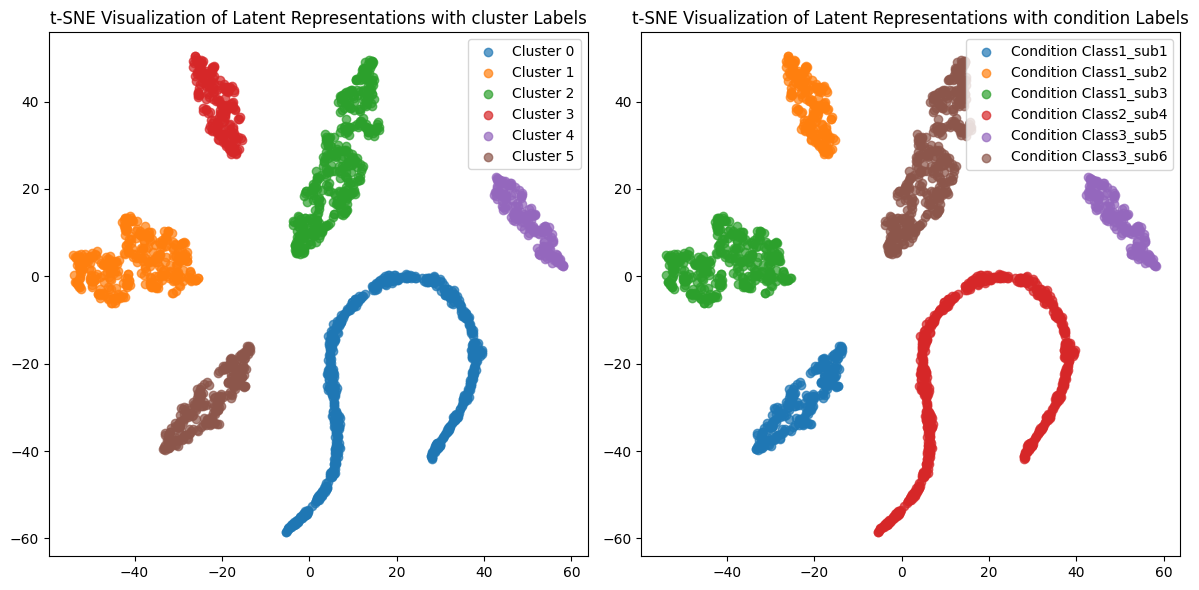

In [27]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=0)
latent_2d = tsne.fit_transform(latent_representations)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for cluster in set(clusters):
    indices = (clusters == cluster)
    axes[0].scatter(latent_2d[indices, 0], latent_2d[indices, 1], label=f'Cluster {cluster}', alpha=0.7)
axes[0].set_title('t-SNE Visualization of Latent Representations with cluster Labels')
axes[0].legend()

conditions = df_meta_data['condition'].values
unique_conditions = np.unique(conditions)
for condition in unique_conditions:
    indices = (conditions == condition)
    axes[1].scatter(
        latent_2d[indices, 0],
        latent_2d[indices, 1],
        label=f'Condition {condition}',
        alpha=0.7
    )
axes[1].set_title('t-SNE Visualization of Latent Representations with condition Labels')
axes[1].legend()

plt.tight_layout()
plt.show()


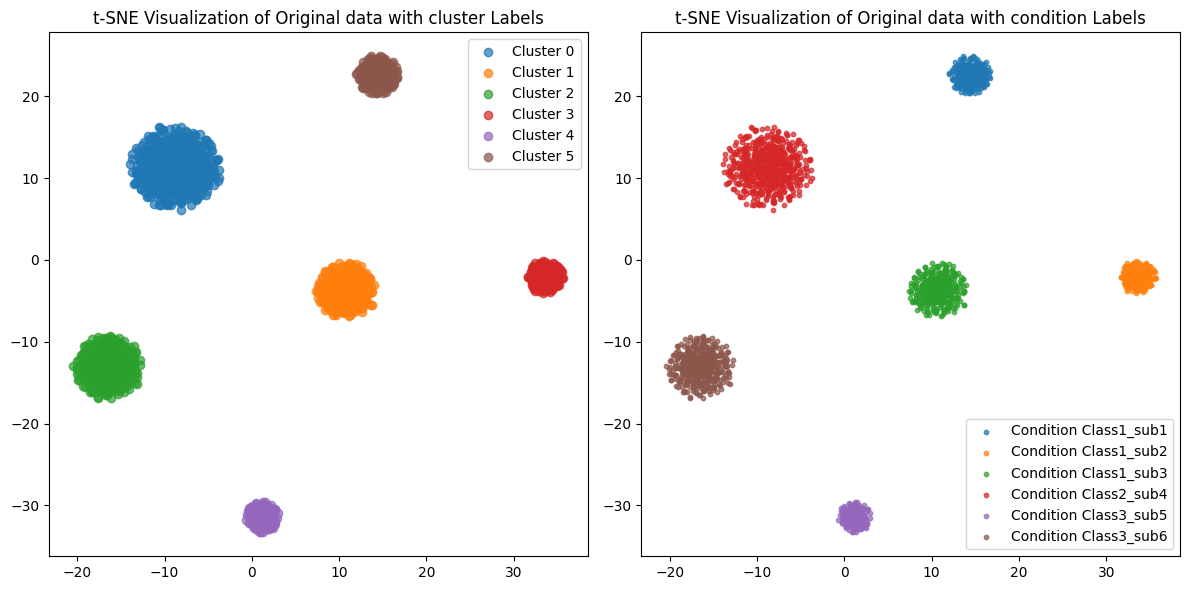

In [29]:
tsne = TSNE(n_components=2, random_state=0)
latent_2d = tsne.fit_transform(df.T)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for cluster in set(clusters):
    indices = (clusters == cluster)
    axes[0].scatter(latent_2d[indices, 0], latent_2d[indices, 1], label=f'Cluster {cluster}', alpha=0.7)
axes[0].set_title('t-SNE Visualization of Original data with cluster Labels')
axes[0].legend()

conditions = df_meta_data['condition'].values
unique_conditions = np.unique(conditions)
for condition in unique_conditions:
    indices = (conditions == condition)
    axes[1].scatter(
        latent_2d[indices, 0],
        latent_2d[indices, 1],
        label=f'Condition {condition}',
        alpha=0.7,
        s = 10
    )
axes[1].set_title('t-SNE Visualization of Original data with condition Labels')
axes[1].legend()

plt.tight_layout()
plt.show()
